In [1]:
import librosa
from librosa import display
from librosa import feature

import numpy as np
from numpy import typing as npt

from matplotlib import pyplot as plt


In [7]:
y, sr = librosa.load("./Mozart_Turkish_March.wav", duration=10)

In [15]:
def plot_mel_spectrogram(y: npt.ArrayLike, sr:int, with_pitch : bool = True) :

    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    if with_pitch :
        
        f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                                     fmin=librosa.note_to_hz('C2'),
                                                     fmax=librosa.note_to_hz('C7'))
        times = librosa.times_like(f0)

        fig, ax = plt.subplots()
        img = librosa.display.specshow(S_dB, x_axis='time',
                                       y_axis='mel', sr=sr, 
                                       fmax=8000, ax=ax)
        ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
        
        ax.legend(loc='upper right')
        ax.set(title='Mel-frequency spectrogram')


    else :
        fig, ax = plt.subplots()
        img = librosa.display.specshow(S_dB, x_axis='time',
                                       y_axis='mel', sr=sr, 
                                       fmax=8000, ax=ax)

        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        ax.set(title='Mel-frequency spectrogram')

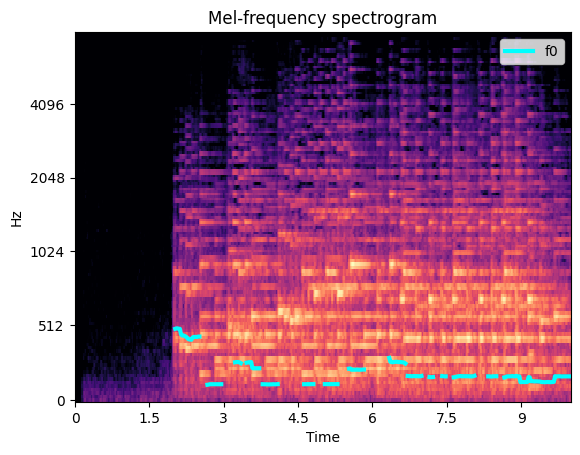

In [16]:
plot_mel_spectrogram(y, sr)

In [10]:
def plot_constant_q_transform(y: npt.ArrayLike, sr:int) :

    C = np.abs(librosa.cqt(y, sr=sr))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                                   sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)

    ax.set_title('Constant-Q power spectrum')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

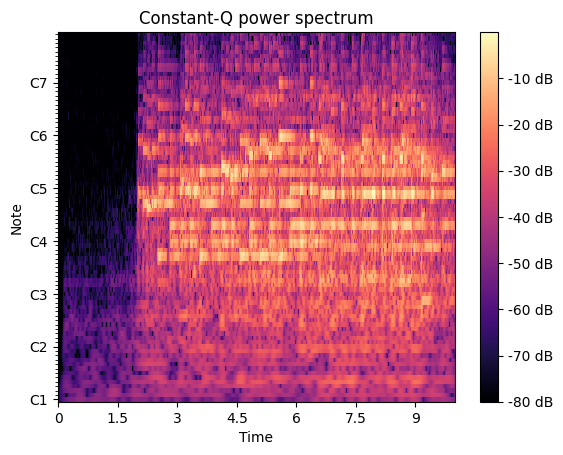

In [11]:
plot_constant_q_transform(y, sr)